# Metropolis-Hastings

Markov chain Monte Carlo (*MCMC*) are general purpose methods to generate samples from any probability distribution $\pi(\mathbf{x})$ where $\mathbf{x} \in S$. From now on
$\pi(\mathbf{x})$ is called the **target**. The state space $S$ can be finite, countable infinite or $S \subseteq \mathbb{R}^{d}$ for some positive integer $d$.

Starting from an initial state $\mathbf{x}_{0}$, *MCMC* proceeds as follows.

1. Generate a candidate $\mathbf{x}^{*}$ using a **proposal** distribution 
$q(\mathbf{x}^{*}; \mathbf{x}_n)$ centered at the current state $\mathbf{x}_n$. 

2. Decide whether $\mathbf{x}^{*}$ or $\mathbf{x}_n$ becomes the next state 
$\mathbf{x}_{n + 1}$.


## Proposal distribution

The only requirement for a proposal distribution $q(\mathbf{x}^{'}; \mathbf{x})$ 
is that it is easy to generate samples from it. $q(\mathbf{x}^{'}; \mathbf{x})$ is the probability to arrive in infinitisimal 
region $\mathbf{x}^{*}d\mathbf{x}$ centered in $\mathbf{x}^{*}$ when in state
$\mathbf{x}_n$

If $q(\mathbf{x}^{'}; \mathbf{x}) = q(\mathbf{x}; \mathbf{x}^{'})$ 
the proposal distribution is **symmetric** otherwise it is **asymmetric**. 

The 1-dimensional Gaussian distribution 
$$q(x^{'};x) = \frac{1}{ \sigma \sqrt{2 \pi}} e^{-\frac{1}{2} (\frac{x^{'} - x}{\sigma})^2}$$
is a symmetric proposal distribution. The symmetric and asymmetric uniform distributions given below are other examples. The parameter $\sigma$ tells us how far on average the candidate 
is generated from the current state. *MCMC*-performance depends critically on the spread $\sigma$. 

*Note*: Some other people use the notation $q(\mathbf{x}^{'} | \mathbf{x})$ instead of $q(\mathbf{x}^{'}; \mathbf{x})$. 

## Acceptance decision

The decision to accept the proposed candidate is such that if $\mathbf{x}_n$ is generated according to the target this is also the case for $\mathbf{x}_{n +1}$: 
$$\mathbf{x}_{n} \sim \pi(\mathbf{x}) \text{   implies   } \mathbf{x}_{n +1} \sim \pi(\mathbf{x})$$
Once the chain converged the states generated follow the target distribution. 
In other words the converged chain acts like random generator for the target.

## Metropolis-Hastings

The **Metropolis-Hastings** or *MH*-algorithm is the canonical example of *MCMC*.

The probability $\alpha_{MH}$ that the candidate $\mathbf{x}^{*}$ becomes the next state
$\mathbf{x}_{n + 1}$, when $\mathbf{x}_{n}$ is the current state, is given by

$$\alpha_{MH}(\mathbf{x}^{*}; \mathbf{x}_{n} ) =  \min \left\lbrace   1, \dfrac{ \pi(\mathbf{x}^* ) 
q(\mathbf{x}_n ; \mathbf{x}^*)} {\pi(\mathbf{x}_{n})  q(\mathbf{x}^{*} ; \mathbf{x}_n)}\right\rbrace $$
Note that $1 - \alpha_{MH}$ is the probabilityb that $\mathbf{x}_{n}$ is the next state.

For a **symmetric** proposal distribution the above criterion simplies to 

$$\alpha_{MH}(\mathbf{x}^{*}; \mathbf{x}_{n} ) =  \min \left\lbrace   1, \dfrac{ \pi(\mathbf{x}^* ) 
} {\pi(\mathbf{x}_{n}) }\right\rbrace $$

# Performance of *MH*

The spread of the proposal distribution, e.g. the variance $\sigma^2$ in the Gaussian distribution above, has a high impact on the performance of $MH$.

If the spread is too small the acceptance probability $\alpha_{MH}(\mathbf{x}^{*}; \mathbf{x}_{n} )$ is very high since $\pi(\mathbf{x}^{*}) \approx \pi(\mathbf{x}_{n})$.
But the chain moves most of the time to nearby states. It takes too long to explore 
far away regions.

If the spread is too large, the acceptance probability becomes too small. 
The chain stays in the same state for longer periods of time before it makes a large jump.

The spread of the proposal distribution has to be tuned to find the right balance.
An acceptance probability of about 30\% is considered ideal.

# Assignment

Compare symmetric and asymmetric proposal distributions on a asymmetric target with one heavy tail. Use different values for the spread of the proposal.

1. the target is a log-normal distribution
2. the symmetric and asymmetric proposal distributions are the uniform distributions 
$U(- \rho, \rho)$ and $U(\frac{1}{\rho}, \rho)$, respectively, where $\rho > 0$ is the spread.

The are described next.

## Log-normal  distribution

Suppose we want to draw samples from the **log-normal** probability distribution with parameters $\mu = 2.0$ and $\sigma = 0.75$ 

$$\pi(x ; \mu, \sigma) = \frac{1}{x \sigma \sqrt{2 \pi}} e^{- \frac{1}{2} {\left(\frac{\ln x - \mu}{ \sigma } \right)} ^2} ~~~ x > 0
$$where $\ln \triangleq \log_e$ is the natural logarithm. 

The log-normal distribution is asymetric in nature.

## Symmetric Proposal $U(- \rho, \rho)$

$U(- \rho, \rho)$ is the uniform distribution on the closed interval $[- \rho, \rho ]$.
The tunable parameter $\rho > 0$ is the spread. Note that $U$ is symmetric around $0$.

When in $x$, *MH* generates the candidate 
$$x^{*} \sim U(x - \rho, x+ \rho)$$
But this is equivalent to 
$$
x^* = x + \Delta x \text{ where } \Delta x \sim U(-\rho,\rho)
$$

The proposal distribution $q(x^* ; x) = U(x - \rho, x+ \rho)$ is symmetric. 
The probability of arriving in the interval $[x^*, x^* + dx]$ when we are at $x$ is:

$$q(x^* ; x) = \frac{dx}{2\rho}$$

While the probability that $x$ is the interval $[x, x + dx]$ when we are at $x^*$ is given by

$$q(x ; x^*) = \frac{dx}{2\rho}= q( x^* ; x) $$

The two probabilities cancel out and the acceptance criteria for **symmetric** proposals applies 


$$\alpha_{MH}(x^{*}; x_{n} ) =  \min \left\lbrace   1, \dfrac{ \pi(x^* ) 
} {\pi(x_{n}) }\right\rbrace $$


# Asymmetric Proposal $U(\frac{1}{\rho}, \rho)$


In case of the $U(\frac{1}{\rho}, \rho)$ as proposal the candidates will be generated in the **log**-domain instead, i.e. 
$$x^* =  \beta x, ~~~ \beta \sim U(\frac{1} {\rho}, \rho)$$

Note that the proposal distribution $U(x - \frac{1}{\rho}, x + \rho)$ is asymmetric. The probability that the candidate $x^*$  is in the interval $[x^*, x^* + dx]$ 
when we are at $x$ is given by

$$q(x^* ; x) = \frac{dx}{x(\rho - 1/\rho)}$$

While the probability that $x$ is the interval $[x, x + dx]$ when we are at $x^*$ is given by

$$q(x ; x^*) = \frac{dx}{x^*(\rho - 1/\rho)}$$


The ratio of the two equals

$$\frac{q(x^* ; x)}{q(x ; x^*)} = \frac{x^*}{x}$$

Since this ratio is different from one we have to use 

$$\alpha_{MH}(x^{*}; x_{n} ) =  \min \left\lbrace   1, \dfrac{ \pi(x^* ) 
q(x_n ; x^*)} {\pi(x_{n})  q(x^{*} ; {x}_n)}\right\rbrace $$

instead of the simplified expression for symmetric proposals.

Going beyond symmetric proposal distributions  makes it possibility to propose bold moves and still have a high acceptance probability. This is an immediate consequence of the equation for MH-acceptance probability above.

Note that the candidate $x^*$ will always be accepted if we can find an asymmetric proposal distribution satisfying

$$
\frac{q(x^* ; x)}{q(x ; x^*)} = \frac{\pi(x^*)}{\pi(x)}
$$

where $\pi$ is the target distribution as usual.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpmath import *
import scipy.stats as ss
from scipy.stats import lognorm

In [2]:
np.random.seed=10000

# *Target*: Log-normal 

In [3]:
def specify_log_normal2(mu=2.0, sigma=0.75):
    return lambda x: (np.exp(-(np.log(x)-mu)**2/(2*sigma**2))/(x*sigma*np.sqrt(2*np.pi)))

In [4]:
def specify_log_normal(mu=2.0, sigma=0.75):
    return lambda x: (np.exp(-1/2*((np.log(x)-mu)/sigma)**2)/(x*sigma*np.sqrt(2*np.pi)))

In [5]:
def plot_function(p, start, stop, resolution):
    x = np.linspace(start, stop, resolution, endpoint=True)
    p_of_x = p(x)
    fig, ax = plt.subplots()
    ax.plot(x, p(x))
    ax.set(xlim=(start, stop), ylim=(0.0, np.max(p_of_x)), 
           xlabel='$x$', ylabel='$\pi(x)$', 
           title=f'Log-normal distribution with parameters')

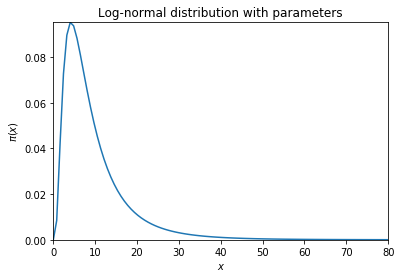

In [6]:
plot_function(p=specify_log_normal2(mu=2.0, sigma=0.75), 
              start=10**-100, stop=80, resolution=100)

# Log-normal with symmetric proposal

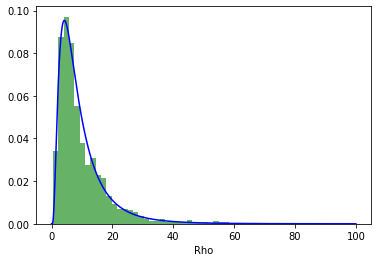

In [12]:
 
mu = 2.0   #waarde die gekozen is voor de targetfunctie
sigma = 0.75 #idem
rho = 200

np.seterr(divide='raise', invalid='raise')    #extra duiding bij errors

target_1 = lambda x: (np.exp(-(np.log(x)-mu)**2/(2*sigma**2))/(x*sigma*np.sqrt(2*np.pi)))    #De 2 target functies
target_2 = lambda x: (np.exp(-1/2*((np.log(x)-mu)/sigma)**2)/(x*sigma*np.sqrt(2*np.pi)))     

symmetric_proposal = lambda x: x +  np.random.uniform(-rho , rho)                            #de symmetrische proposal

iters = 50000
burn_in = 10000

def plot_density(pdf, title=""):
    xs = np.linspace(0.0001, 100 , 1000)
    plt.plot(xs, list(map(pdf, xs)), 'b')
    plt.title(title);
    plt.xlabel("Rho");
    plt.show()


def mcmc(target, proposal, iters):
    accepts = 0
    rho = 200                             #rho die we kunnen instellen (plek waar geoptimaliseerd moet worden)
    samples = [rho]
    for i in range(iters):
        if rho > 0:
            rho_p = proposal(rho)
            if rho_p > 0:                          #metropolis Hastings, algoritme
                alpha = min(1, target(rho_p) / target(rho))    #Kijk wat de acceptatieratio gaat zijn, dmv de gegeven functie
                u = np.random.uniform()                        #Maak een willekeurig getal dat beslissend is om gegeven rho waarde te accepteren of niet
                if u < alpha:
                    accepts += 1                               #doe de totaal aantal acceptaties omhoog
                    rho = rho_p                                #update de rho waarde door de proposol om erna de proposal te steken in de proposalfunctie
                samples.append(rho)
    return samples

samples = mcmc(target_2 , symmetric_proposal , iters)
plt.hist(samples[burn_in:], 50, density=1, facecolor='green', alpha=0.6)   #teken een histogram voor de geacepteerde rho waarden

plot_density(target_2)                                                     #teken de gewilde targetfunctie erbij 
                                                                           #assymetric proposal werkt op een gelijkaardige manier maar met andere functies

# *Target*: Log-normal with assymmetric proposal

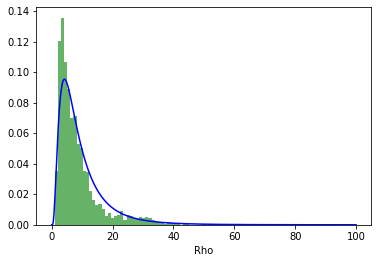

In [11]:
mp.dps = 5000

mu = 2.0
sigma = 0.75
rho= 1.25

target_1 = lambda x: (exp(-(log(x)-mu)**2/(2*sigma**2))/(x*sigma*sqrt(2*np.pi)))
target_2 = lambda x: (exp(-1/2*((log(x)-mu)/sigma)**2)/(x*sigma*sqrt(2*np.pi)))

assymetric_proposal = lambda x: x * ( np.random.uniform((1 / rho) , rho))

iters = 5000
burn_in = 1000

def mcmc(target, proposal, iters):
    accepts = 0
    rho = 1.25
    samples = [rho]
    for i in range(iters):
        if rho > 0:
            rho_p = proposal(rho)
            if rho_p > 0:
                alpha = min(1, (target(rho_p) / target(rho))*(rho / rho_p))   #plaats waar de acceptatieratio wordt berkend
                #print(alpha)
                u = np.random.uniform()    
                if u < alpha:                                                 #acceptatie adhv een willekeurig getal tussen 0 en 1
                    accepts += 1
                    rho = rho_p
                samples.append(rho)
    return samples

samples = mcmc(target_2 , assymetric_proposal , iters)
plt.hist(samples[burn_in:], 50, density=1, facecolor='green', alpha=0.6)

plot_density(target_2)